<a href="https://colab.research.google.com/github/Thinkeraty/Colab/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/whitehatjr/datasets/master/C119/diabetes.csv')

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv('https://raw.githubusercontent.com/whitehatjr/datasets/master/C119/diabetes.csv', names=col_names).iloc[1:]
print(df.head())

  pregnant glucose  bp skin insulin   bmi pedigree age label
1        6     148  72   35       0  33.6    0.627  50     1
2        1      85  66   29       0  26.6    0.351  31     0
3        8     183  64    0       0  23.3    0.672  32     1
4        1      89  66   23      94  28.1    0.167  21     0
5        0     137  40   35     168  43.1    2.288  33     1


In [ ]:
features = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = df[features]
Y = df.label

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print('accuracy', metrics.accuracy_score(Y_test, Y_pred))

accuracy 0.703125


In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0', '1'])
print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<glucose &le; 129.5<br/>gini = 0.452<br/>samples = 576<br/>value = [377, 199]<br/>class = 0>, fillcolor="#f3c4a2"] ;
1 [label=<age &le; 28.5<br/>gini = 0.325<br/>samples = 382<br/>value = [304, 78]<br/>class = 0>, fillcolor="#eca16c"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<bmi &le; 45.4<br/>gini = 0.191<br/>samples = 215<br/>value = [192, 23]<br/>class = 0>, fillcolor="#e89051"] ;
1 -> 2 ;
3 [label=<bmi &le; 30.45<br/>gini = 0.165<br/>samples = 210<br/>value = [191, 19]<br/>class = 0>, fillcolor="#e88e4d"] ;
2 -> 3 ;
4 [label=<pregnant &le; 7.5<br/>gini = 0.05<br/>samples = 116<br/>value = [113, 3]<br/>class = 0>, fillcolor="#e6843e"] ;
3 -> 4 ;
5 [label=<glucose &le; 128.5<br/>gini = 0.034<br/>samples = 115<br/>value = [113, 2]<br/>class = 0>, fillcolor="#e5833d"] ;
4 -> 5 ;
6 [label=<pedigree &le; 0.668<br/>gini = 0.018<

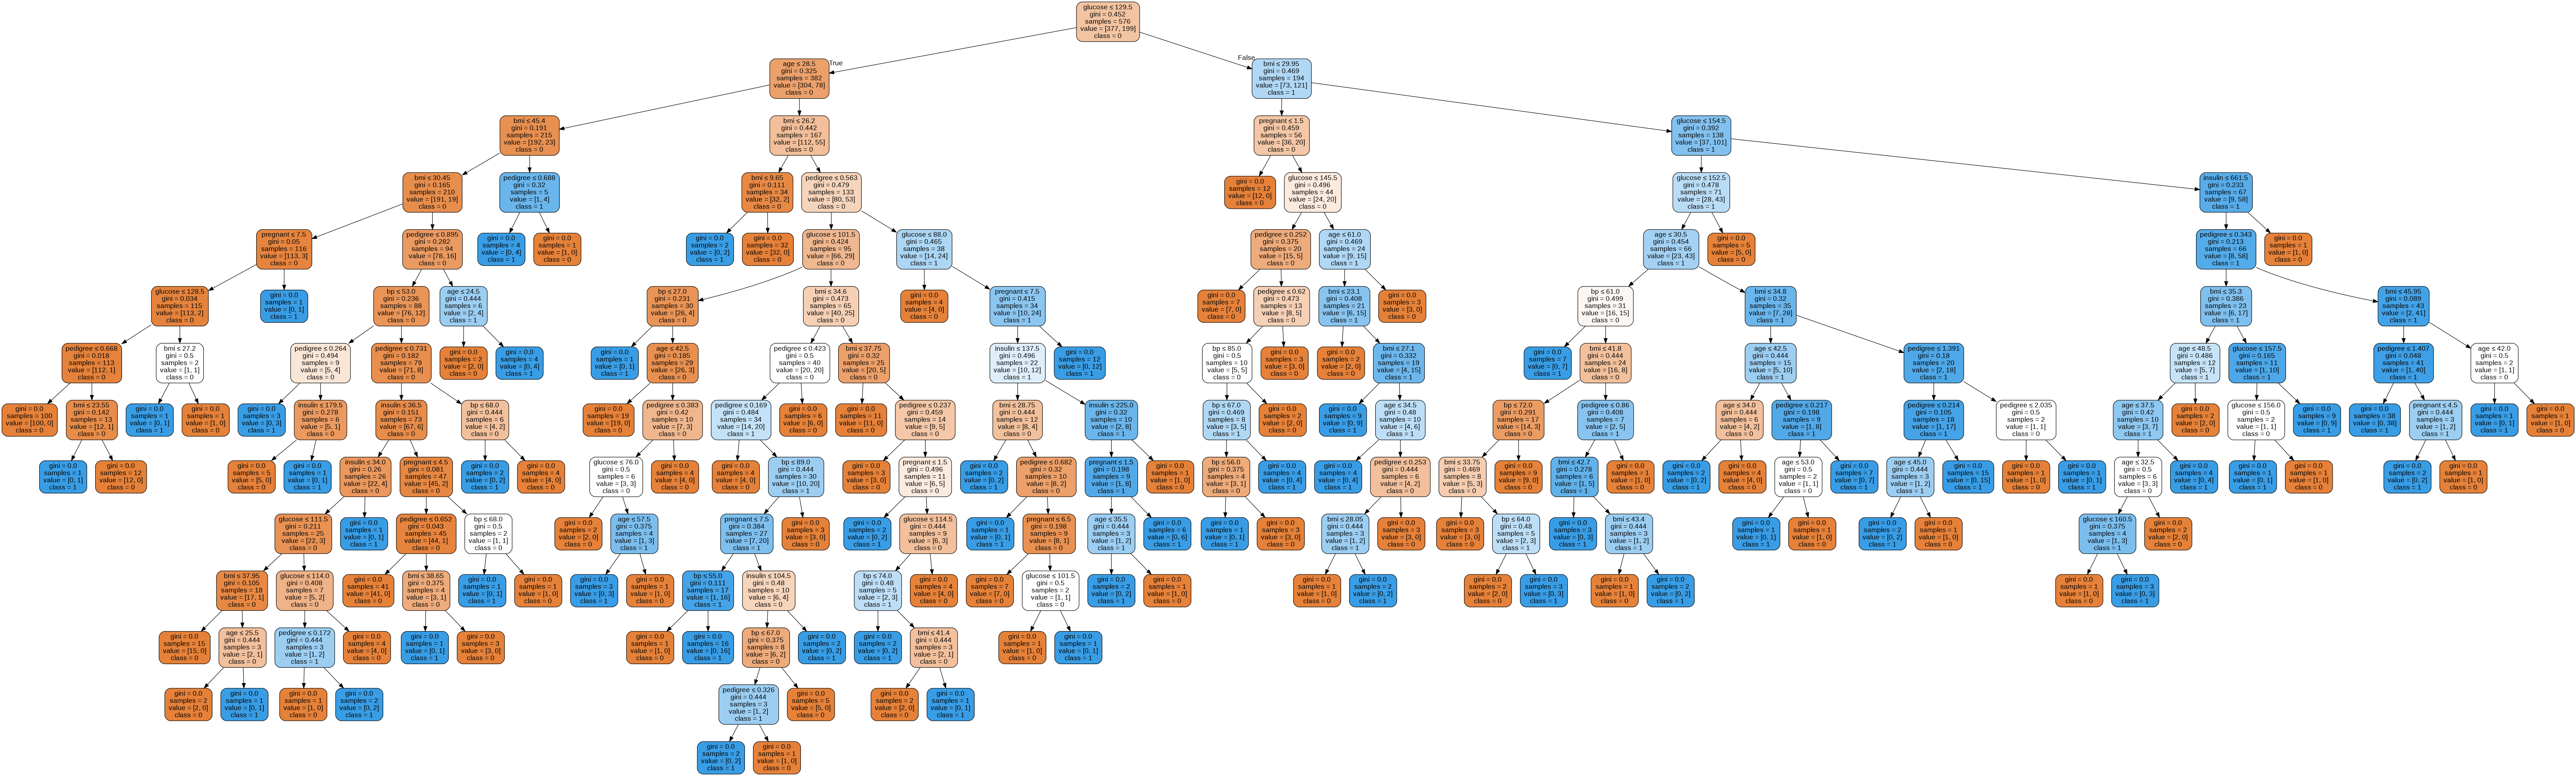

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))

0.7760416666666666


digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<glucose &le; 129.5<br/>gini = 0.452<br/>samples = 576<br/>value = [377, 199]<br/>class = 0>, fillcolor="#f3c4a2"] ;
1 [label=<age &le; 28.5<br/>gini = 0.325<br/>samples = 382<br/>value = [304, 78]<br/>class = 0>, fillcolor="#eca16c"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<bmi &le; 45.4<br/>gini = 0.191<br/>samples = 215<br/>value = [192, 23]<br/>class = 0>, fillcolor="#e89051"] ;
1 -> 2 ;
3 [label=<gini = 0.165<br/>samples = 210<br/>value = [191, 19]<br/>class = 0>, fillcolor="#e88e4d"] ;
2 -> 3 ;
4 [label=<gini = 0.32<br/>samples = 5<br/>value = [1, 4]<br/>class = 1>, fillcolor="#6ab6ec"] ;
2 -> 4 ;
5 [label=<bmi &le; 26.2<br/>gini = 0.442<br/>samples = 167<br/>value = [112, 55]<br/>class = 0>, fillcolor="#f2bf9a"] ;
1 -> 5 ;
6 [label=<gini = 0.111<br/>samples = 34<br/>value = [32, 2]<br/>class = 0>, fillcolor="#e78945"]

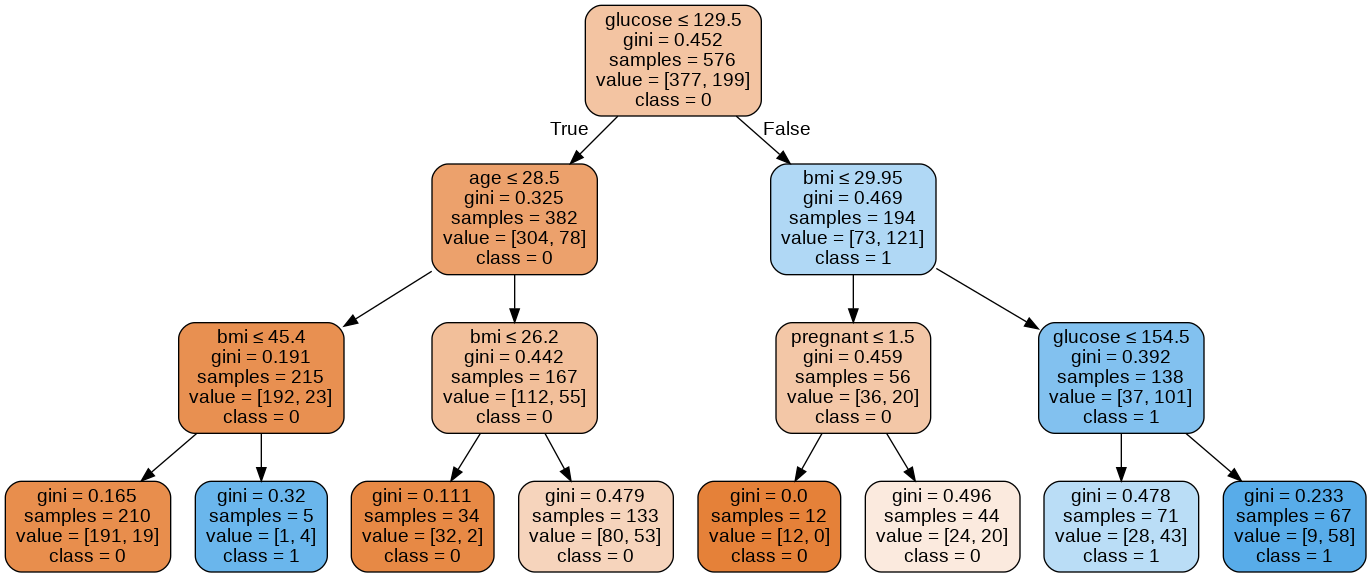

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0', '1'])
print(dot_data.getvalue())

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

the person whose glucose is greater than 129.5 and bmi is greater than 27.85 is more prone to be a diabetes patient